<a href="https://colab.research.google.com/github/chelseaangeles/capstone-project/blob/main/%5BREGRESSION%5D_EMTECH_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEECE 2 Capstone Project**
### *Lifestyle and Learning – Predicting Student Performance*


### **I. Introduction**



This project utilizes a simulated dataset of 1,000 student records sourced from Kaggle. Each record
captures key lifestyle habits—such as study hours, sleep patterns, screen time, diet, and mental health—
and relates them to academic performance, specifically the final exam score. The dataset is ideal for
educational machine learning applications, enabling learners to perform data preprocessing, visualization,
clustering, regression, and classification.
You are tasked with analyzing how these lifestyle factors affect student performance, and building predictive
models based on insights you derive.

Dataset: [student_habits_performance.csv](http://tupmla-my.sharepoint.com/:x:/g/personal/timothy_amado_tup_edu_ph/EfN9-KVzM0JMqo7dl7XNWO4BnY2EA5M44xa27TcDsnJCpA?rtime=Y4fP_uGW3Ug)

### **II. Project Goals**


*   Determine relationships between lifestyle habits and final exam scores
*   Discover meaningful student groupings based on lifestyle through clustering
*   Build and evaluate models that predict academic performance
*   Summarize and communicate findings through data storytelling

### **III. Project Components**

**1.   Problem Definition**

*   Formulate a clear research question.


> *How does mental health status influence the relationship between lifestyle habits and academic performance?*

We aim to:

*   Investigate interaction effects between mental health and lifestyle factors such as study hours per day, sleep hours, part-time job, exercise frequency, diet quality, and total screen time.
*   Determine whether mental health moderates the impact of these habits on performance.
*   Build predictive models and interpret feature importances.

**2.   Data Understanding and Preprocessing**

*   Load and inspect the dataset.
*   Handle:
    - Missing values
    - Categorical variables (apply label/one-hot encoding)
    - Scaling (for models like K-Means and regression)
*   Engineer new features if helpful (e.g., combine screen time metrics)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sns.set(style="whitegrid")

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = "/content/drive/My Drive/CAPSTONE-PROJECT/student_habits_performance.xlsx"
df = pd.read_excel(file_path)
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
# Drop ID column
df.drop(columns=["student_id", "age", "gender", "parental_education_level", "internet_quality",
                 "extracurricular_participation"], inplace=True)

# Map non-numeric data to numeric
df['diet_quality'] = df['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})
df['part_time_job'] = df['part_time_job'].map({'No': 0, 'Yes': 1})

# Impute missing numeric values with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [ ]:
# Combine social_media_hours and netflix_hours to create a new feature called total_screen_time
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']
#df_scaled['total_screen_time'] = scaler.fit_transform(df[['total_screen_time']])

display(df[['social_media_hours', 'netflix_hours', 'total_screen_time']].head())

,social_media_hours,netflix_hours,total_screen_time
0,1.2,1.1,2.3
1,2.8,2.3,5.1
2,3.1,1.3,4.4
3,3.9,1.0,4.9
4,4.4,0.5,4.9


In [ ]:
df.drop(column
s=["social_media_hours", "netflix_hours"], inplace=True)

**3. Exploratory Data Analysis (EDA)**

*   Visualizations:
    - Histograms for feature distributions
    - Scatter plots and box plots for comparing habits vs. scores
    - Correlation heatmap


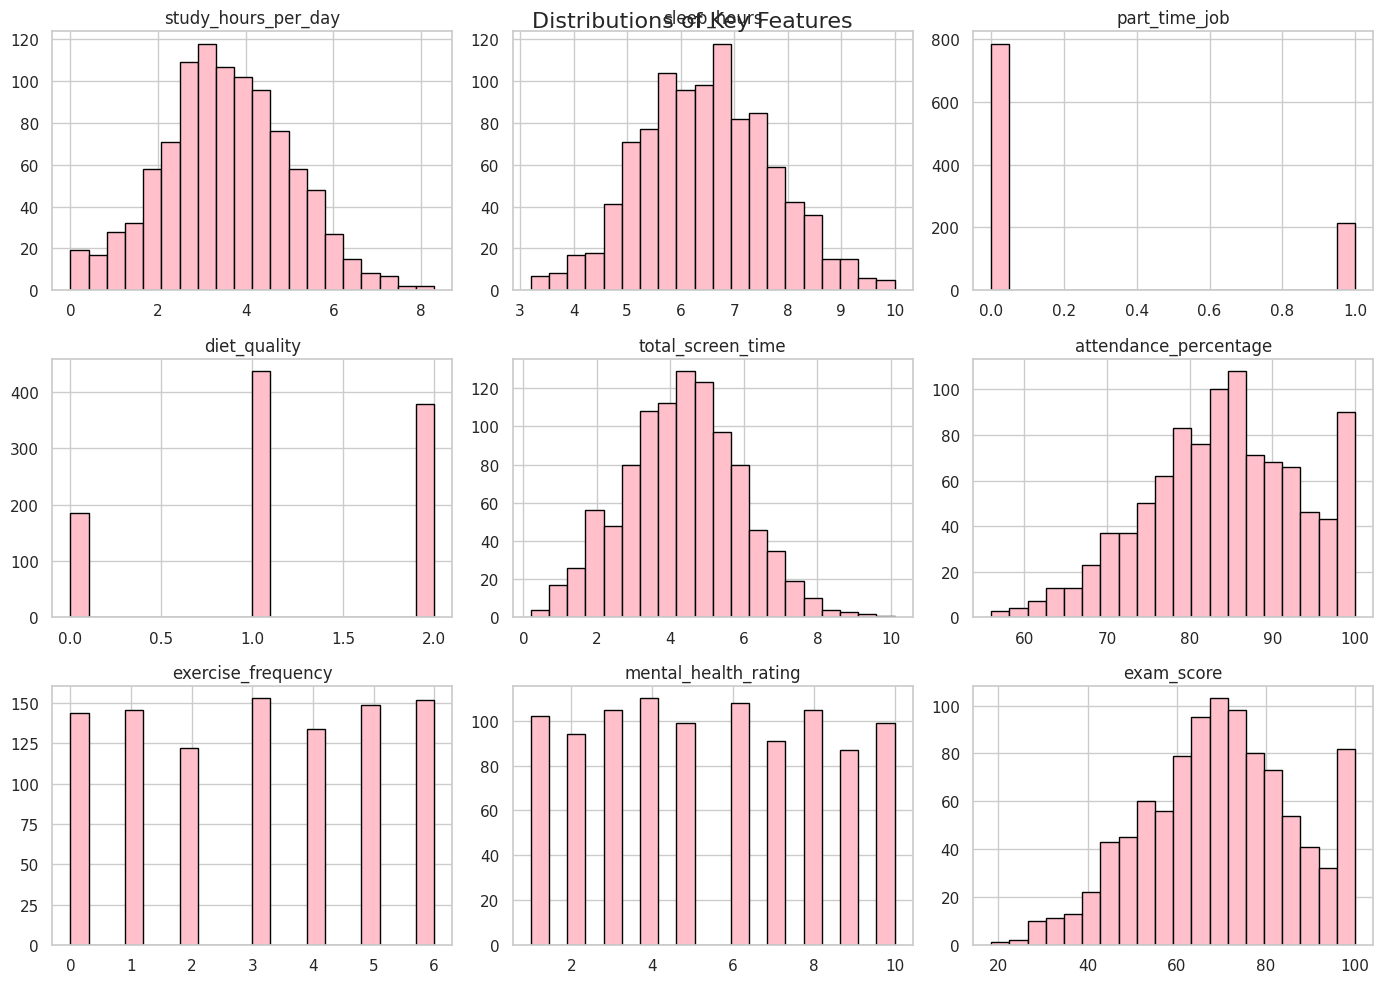

In [ ]:
# A. Histograms
df[['study_hours_per_day', 'sleep_hours', 'part_time_job', 'diet_quality', 'total_screen_time',  'attendance_percentage',
    'exercise_frequency', 'mental_health_rating', 'exam_score']].hist(bins=20, figsize=(14, 10), color='pink', edgecolor='black')
plt.tight_layout()
plt.suptitle("Distributions of Key Features", fontsize=16)
plt.show()

The objective of this project is to answer the research question "How does mental health status influence the relationship between lifestyle habits and academic performance?"

The data visualized above are selected the features to be used in this capstone project. The selected are the features considered to be a factor affecting exam scores, such as lifestyle habits (e.g. `study_hours_per_day`, `sleep_hours`, `diet_quality`,`total_screen_time`, `attendance_percentage`, and `exercise_frequency`). `mental_health_rating` is a factor that affects a student's lifestyle habits so it is also a factor needed to be considered.







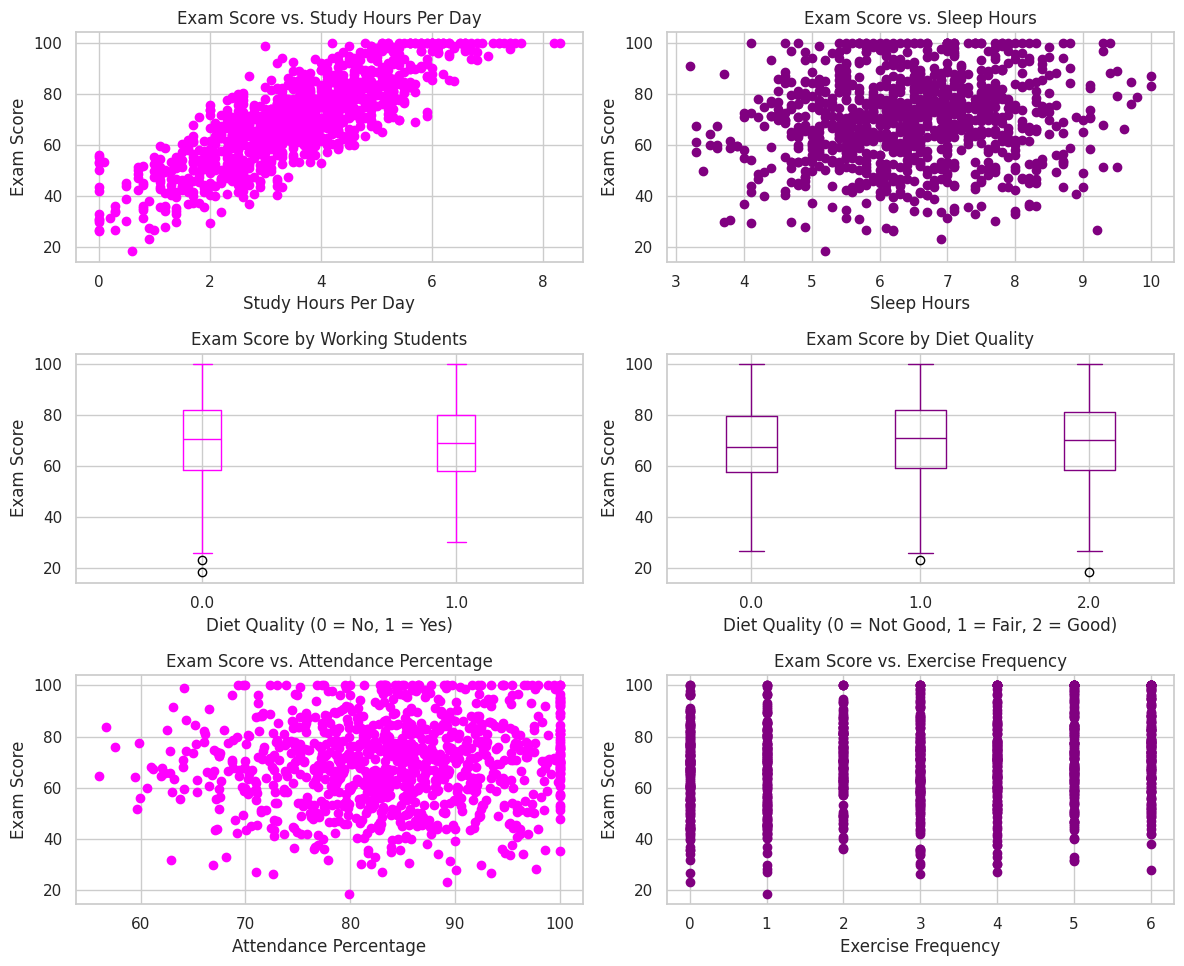

In [ ]:
#B. Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Scatter plot for study_hours_per_day vs. exam_score
axes[0, 0].scatter(df['study_hours_per_day'], df['exam_score'], color='magenta')
axes[0, 0].set_xlabel('Study Hours Per Day')
axes[0, 0].set_ylabel('Exam Score')
axes[0, 0].set_title('Exam Score vs. Study Hours Per Day')

# sleep_hours vs. exam_score:
axes[0, 1].scatter(df['sleep_hours'], df['exam_score'], color='purple')
axes[0, 1].set_xlabel('Sleep Hours')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].set_title('Exam Score vs. Sleep Hours')

# Box plot for part_time_job vs. exam_score
df.boxplot(column='exam_score', by='part_time_job', ax=axes[1, 0], color='magenta')
axes[1, 0].set_xlabel('Diet Quality (0 = No, 1 = Yes)')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].set_title('Exam Score by Working Students')
fig.suptitle('') # Suppress the default title

# Box plot for diet_quality vs. exam_score
df.boxplot(column='exam_score', by='diet_quality', ax=axes[1, 1], color='purple')
axes[1, 1].set_xlabel('Diet Quality (0 = Not Good, 1 = Fair, 2 = Good)')
axes[1, 1].set_ylabel('Exam Score')
axes[1, 1].set_title('Exam Score by Diet Quality')
fig.suptitle('') # Suppress the default title

# attendance_percentage vs. exam_score:
axes[2, 0].scatter(df['attendance_percentage'], df['exam_score'], color='magenta')
axes[2, 0].set_xlabel('Attendance Percentage')
axes[2, 0].set_ylabel('Exam Score')
axes[2, 0].set_title('Exam Score vs. Attendance Percentage')

# exercise_frequency vs. exam_score:
axes[2, 1].scatter(df['exercise_frequency'], df['exam_score'], color='purple')
axes[2, 1].set_xlabel('Exercise Frequency')
axes[2, 1].set_ylabel('Exam Score')
axes[2, 1].set_title('Exam Score vs. Exercise Frequency')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

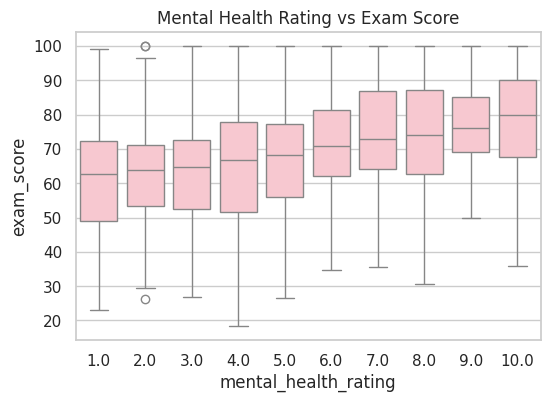

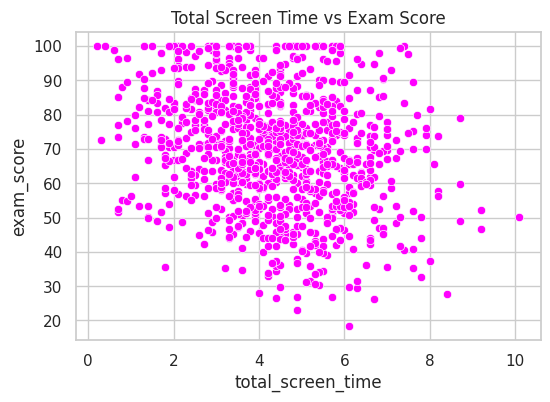

In [ ]:
#C. Box Plot: Mental Health vs Exam Score
plt.figure(figsize=(6, 4))
sns.boxplot(x='mental_health_rating', y='exam_score', color='pink', data=df)
plt.title("Mental Health Rating vs Exam Score")
plt.show()

#D. Scatter Plot: Total Screen Time vs Exam Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_screen_time', y='exam_score', color='magenta', data=df)
plt.title("Total Screen Time vs Exam Score")
plt.show()

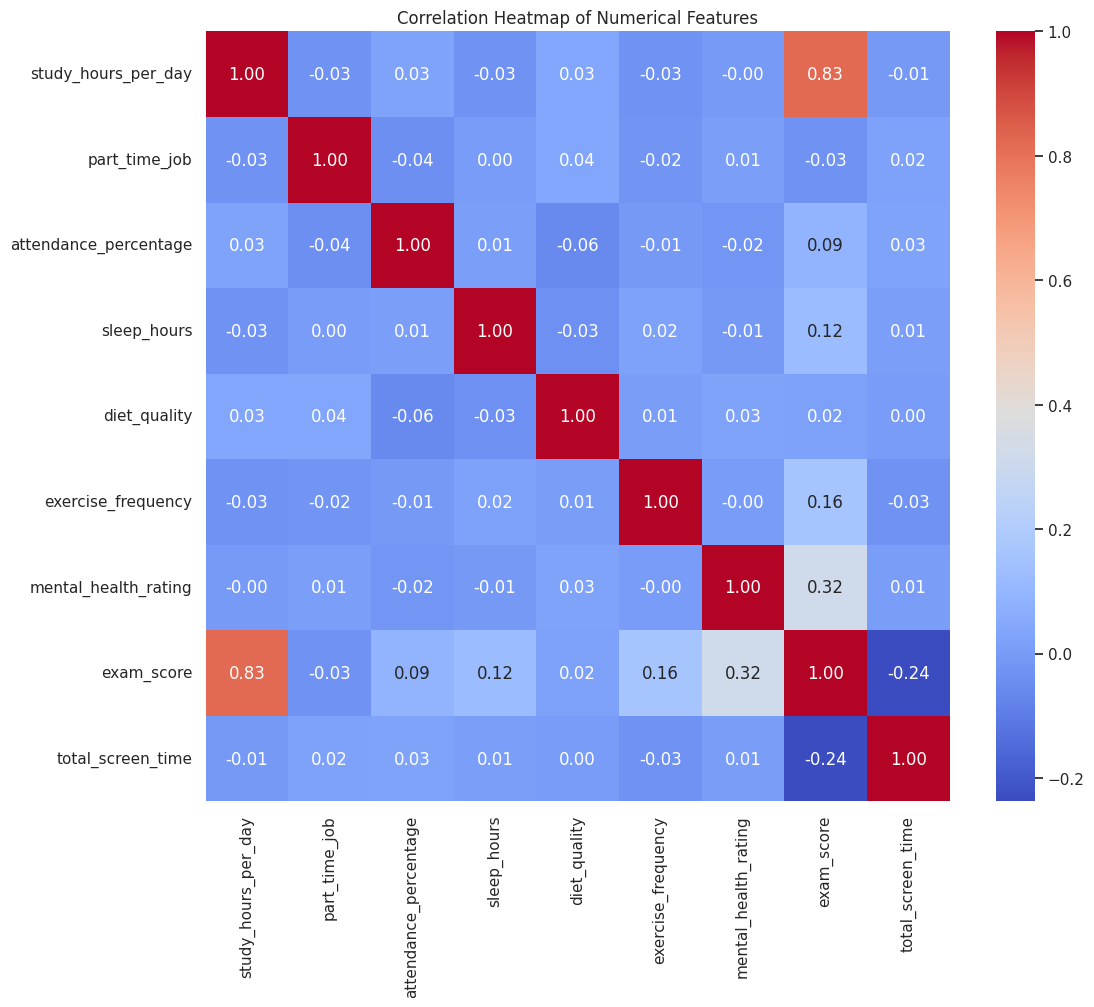

In [ ]:
# E. Correlation heatmap
# Re-evaluate numeric columns after dropping 'social_media_hours' and 'netflix_hours'
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**5.  Regression Analysis (Supervised Learning)**

*   Use the following models to predict Final Exam Score:
    - Linear Regression
    - Decision Tree Regressor
    - Random Forest Regressor
*   Evaluate models using:
    - MAE, RMSE, and R² score
    - Train/test split and cross-validation


A. Linear Regression

In [ ]:
# Data Preparation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features for the model
features = ['study_hours_per_day', 'sleep_hours', 'part_time_job', 'exercise_frequency',
            'diet_quality', 'total_screen_time', 'mental_health_rating']

X = df[features].copy()
y = df['exam_score']

# Create interaction terms between mental_health_rating and selected lifestyle features
interaction_features = ['study_hours_per_day', 'sleep_hours', 'exercise_frequency', 'diet_quality', 'total_screen_time']

for col in interaction_features:
    X[f'{col}_x_mental_health'] = X[col] * X['mental_health_rating']

# Display first 5 rows to check
X.head()

,study_hours_per_day,sleep_hours,part_time_job,exercise_frequency,diet_quality,total_screen_time,mental_health_rating,study_hours_per_day_x_mental_health,sleep_hours_x_mental_health,exercise_frequency_x_mental_health,diet_quality_x_mental_health,total_screen_time_x_mental_health
0,0.0,8.0,0.0,6.0,1.0,2.3,8.0,0.0,64.0,48.0,8.0,18.4
1,6.9,4.6,0.0,6.0,2.0,5.1,8.0,55.2,36.8,48.0,16.0,40.8
2,1.4,8.0,0.0,1.0,0.0,4.4,1.0,1.4,8.0,1.0,0.0,4.4
3,1.0,9.2,0.0,4.0,0.0,4.9,1.0,1.0,9.2,4.0,0.0,4.9
4,5.0,4.9,0.0,3.0,1.0,4.9,1.0,5.0,4.9,3.0,1.0,4.9


In [ ]:
# Initialize scaler and scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE (mean_squared_error without squared=False for older versions)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression Performance:
MAE: 4.26
RMSE: 5.23
R² Score: 0.89


In [ ]:
# Cross-validation evaluation (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Negative MSE converted to RMSE for scoring
cv_rmse_scores = np.sqrt(-cross_val_score(lr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(lr, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(lr, X_scaled, y, cv=kf, scoring='r2')

print(f"\nCross-validation results (5 folds):")
print(f"Average RMSE: {cv_rmse_scores.mean():.2f}")
print(f"Average MAE: {cv_mae_scores.mean():.2f}")
print(f"Average R²: {cv_r2_scores.mean():.2f}")


Cross-validation results (5 folds):
Average RMSE: 5.53
Average MAE: 4.43
Average R²: 0.89


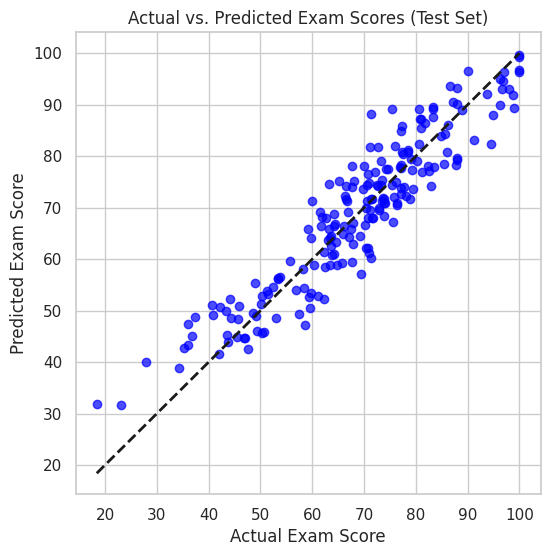

In [ ]:
# Visualizing Predicted vs. Actual Exam Scores (Test Set)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores (Test Set)')
plt.grid(True)
plt.show()


Linear Regression Coefficients (including interaction terms):
                                Feature  Coefficient
0                   study_hours_per_day    14.724521
6                  mental_health_rating     6.859877
5                     total_screen_time    -4.347164
3                    exercise_frequency     3.661714
1                           sleep_hours     2.544615
9    exercise_frequency_x_mental_health    -1.338393
7   study_hours_per_day_x_mental_health    -1.120605
11    total_screen_time_x_mental_health     0.590898
4                          diet_quality    -0.434577
8           sleep_hours_x_mental_health    -0.260373
10         diet_quality_x_mental_health     0.172613
2                         part_time_job     0.055259


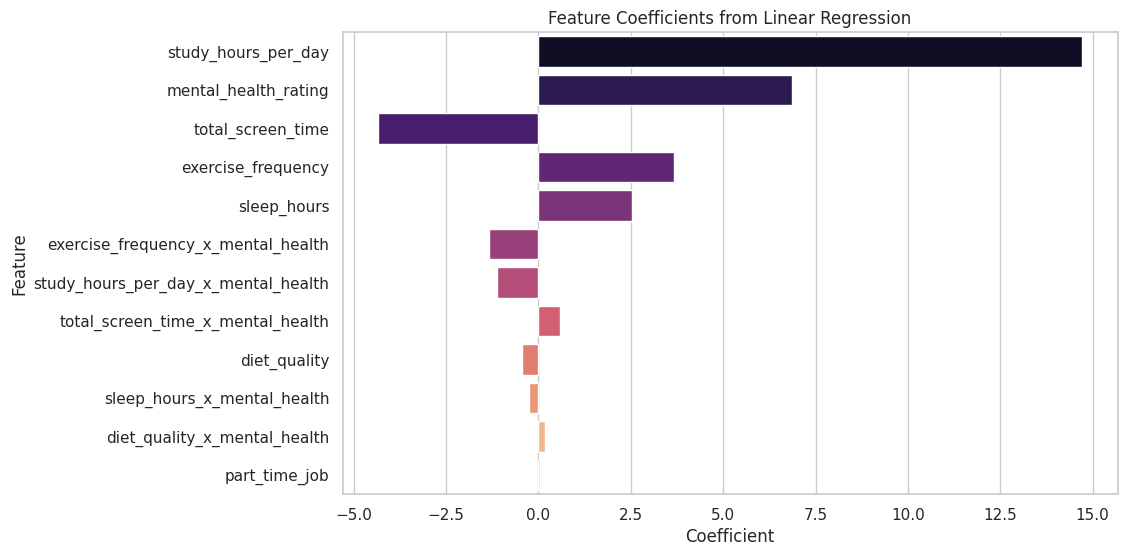

In [ ]:
# Retrieve feature names after interaction term creation
feature_names = X.columns

# Create a DataFrame of features and their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nLinear Regression Coefficients (including interaction terms):")
print(coef_df)

# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='magma', hue='Feature', legend=False)
plt.title('Feature Coefficients from Linear Regression')
plt.show()

B. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = dt_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE (mean_squared_error without squared=False for older versions)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regressor Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Decision Tree Regressor Performance:
MAE: 6.88
RMSE: 8.78
R² Score: 0.70


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_mae = -cross_val_score(dt_reg, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()
cv_rmse = np.sqrt(-cross_val_score(dt_reg, X, y, cv=kf, scoring='neg_mean_squared_error')).mean()
cv_r2 = cross_val_score(dt_reg, X, y, cv=kf, scoring='r2').mean()

print(f"\nCross-validation results (5 folds):")
print(f"Average MAE: {cv_mae:.2f}")
print(f"Average RMSE: {cv_rmse:.2f}")
print(f"Average R²: {cv_r2:.2f}")


Cross-validation results (5 folds):
Average MAE: 6.97
Average RMSE: 8.89
Average R²: 0.72


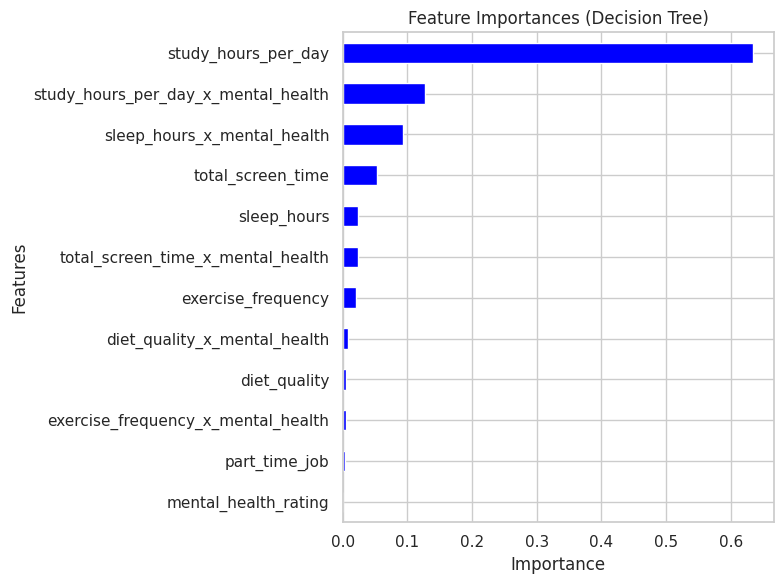

In [ ]:
importances = pd.Series(dt_reg.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='blue')
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

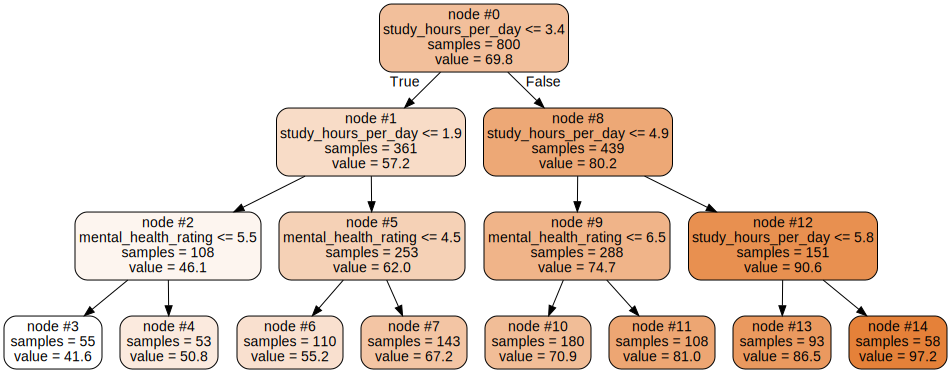

In [ ]:
# Visualize the simplified decision tree
dot_data_s = export_graphviz(dt_simple,
                             feature_names=selected_features,
                             filled=True,
                             rounded=True,
                             impurity=False,
                             node_ids=True,
                             proportion=False,
                             precision=1)

# Render and display
graph_s = graphviz.Source(dot_data_s)
display(graph_s)

C. Random Forest Regressor

In [ ]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE first (mean_squared_error without squared=False for older versions)
mse = mean_squared_error(y_test, y_pred)
# Then calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Random Regressor Performance:
MAE: 4.26
RMSE: 5.23
R² Score: 0.89


In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

                                Feature  Importance
0                   study_hours_per_day    0.626036
7   study_hours_per_day_x_mental_health    0.170585
5                     total_screen_time    0.056708
8           sleep_hours_x_mental_health    0.047601
1                           sleep_hours    0.028361
9    exercise_frequency_x_mental_health    0.024995
11    total_screen_time_x_mental_health    0.017645
3                    exercise_frequency    0.013489
10         diet_quality_x_mental_health    0.007326
4                          diet_quality    0.002851
2                         part_time_job    0.002348
6                  mental_health_rating    0.002055


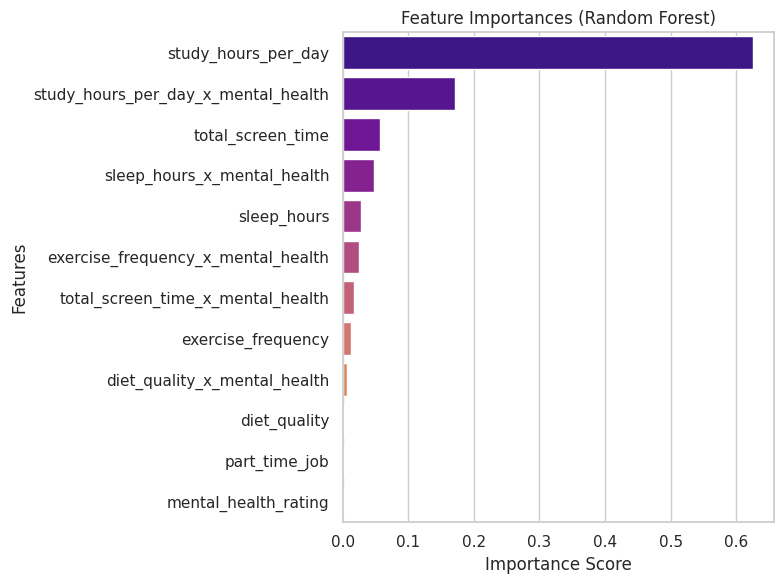

In [ ]:
importances = rf_model.feature_importances_
features = X.columns

# Create a pandas Series for plotting
feature_importances_series = pd.Series(importances, index=features).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances_series.values, y=feature_importances_series.index, palette="plasma", hue=feature_importances_series.index, legend=False)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### **IV. Interpretation and Insights**